206663


<Axes: xlabel='fct'>

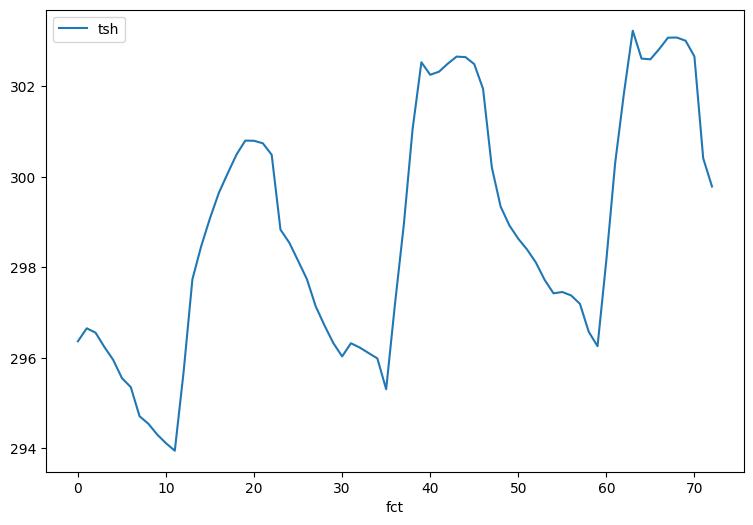

In [10]:
import array
import pandas as pd    
import numpy as np  
import matplotlib.pyplot as plt
from json import loads, dumps
import json
import os 


Dir_run = os.getcwd()
data = array.array('f')
data_new = []
variaveis = 16*[]
var2 = []
var = []
df_plot = []

nfct = 72
fct = np.arange(0, nfct+1)
npnt=147
data_run = '2023051100'
# mkdir 
Dir_json = os.path.join(Dir_run, data_run)
os.mkdir(Dir_json)

def LAtLonSgn(latlon):
    card = latlon[-1]
    if card == "S" or card == "W":
        card_R = float(latlon[0:-1]) * -1
    elif card == "N" or card == "W":
        card_R = float(latlon[0:-1])
    return card_R

ifile = 'eta_staids.parm_147pnts'
with open(ifile) as f:
          eta_staids = f.readlines()

ifile = 'fort.33'
with open(ifile) as f:
          hgtsmk = f.readlines()

ifile = 'HST'+data_run+'.bin'
f = open(ifile, 'rb')
Nrec = 19 * (npnt+2) * (nfct+1)
print(Nrec)

data.fromfile(f, Nrec )
data_new.append(data[1:npnt+1])

for i in range(npnt+3,len(data),npnt+2):
    data_new.append(data[i:i+npnt])

j=0

for i in range(0,len(data_new),19):#
    listval = [fct[j],data_new[i],data_new[i+1],data_new[i+2],data_new[i+3],data_new[i+4],data_new[i+5]
               ,data_new[i+6],data_new[i+7],data_new[i+8],data_new[i+10],data_new[i+11],data_new[i+13]
               ,data_new[i+14],data_new[i+15],data_new[i+17]]
    variaveis.append(listval) 
    j = j + 1

df = pd.DataFrame(variaveis)
df.columns = ["fct","slp","ts","ttprec","tsh","ocis","olis","qs","rh","u10","v10","cfracl","cfracm","cfrach","ufirstlev","vfirstlev"]
for j in range(0,npnt):
    var2 = []
    std = (' '.join(eta_staids[j].split( ))).split(' ')
    std_lat = LAtLonSgn(std[1])
    std_lon = LAtLonSgn(std[2])
    stn_hgtsmk = (' '.join(hgtsmk[j+1].split( ))).split(' ')
    hgt = stn_hgtsmk[1]
    sm = stn_hgtsmk[2]
  
    jsonoutfile = 'hst_'+std[3]+'.json'

    for i in range(0,nfct+1):
        lista = [fct[i],std_lat,std_lon,hgt,sm,df.slp[i][j],df.ts[i][j],df.ttprec[i][j],df.tsh[i][j],df.ocis[i][j]
                 ,df.olis[i][j],df.qs[i][j],df.rh[i][j],df.u10[i][j],df.v10[i][j]
                 ,df.cfracl[i][j],df.cfracm[i][j],df.cfrach[i][j],df.ufirstlev[i][j]
                 ,df.vfirstlev[i][j]]
        var2.append(lista)
    df_plot2 = pd.DataFrame(var2)
    df_plot2.columns = ["fct","lat","lon","hgt","sm","slp","ts","ttprec","tsh","ocis","olis","qs","rh","u10","v10","cfracl","cfracm","cfrach","ufirstlev","vfirstlev"]

    df2 = df_plot2.to_json(orient="records")
    parsed = loads(df2)
    dumps(parsed, indent=4) 
    with open(Dir_json+"/"+jsonoutfile, 'w') as json_file:
        json.dump(parsed, json_file)    

df_plot2.plot(x='fct',y='tsh', figsize=(9,6))
